## Lista 13

### Aluno: Leodécio Braz
### Matricula: 377594

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import euclidean
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


### Carregando o dataset da Lista 12

In [2]:
data = pd.read_csv("csvs/data_1024.csv", delimiter='\t')
#colunas =  df.columns
X = np.genfromtxt("csvs/data_1024.csv", skip_header=1, delimiter='\t')
X = X[:, 1:]

In [3]:
data.head(5)

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


## Métodos de clusterização HC

### Single

In [4]:
hc_single = linkage(X, method="single")

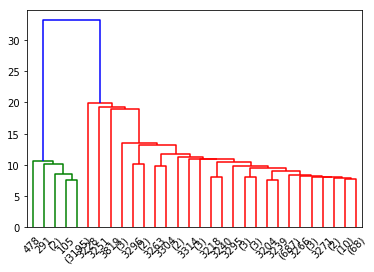

In [5]:
dendrograma_single = dendrogram(hc_single, truncate_mode="lastp")
#plt.ylabel('Euclidean distance')
#plt.show()

### Complete

In [6]:
hc_complete = linkage(X, method="complete")

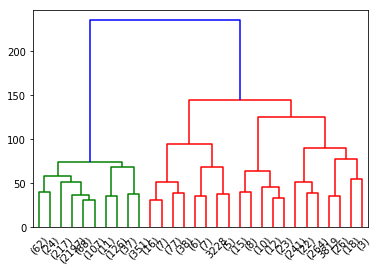

In [7]:
dendrogramas_complete = dendrogram(hc_complete, truncate_mode='lastp')

### Avarage

In [8]:
hc_average = linkage(X, method="average")

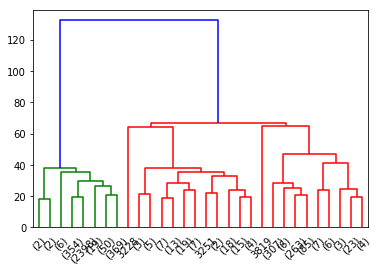

In [9]:
dendrogramas_average = dendrogram(hc_average, truncate_mode='lastp')

### Escolhendo o complete

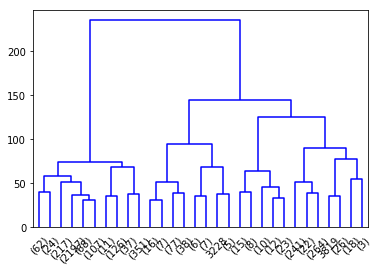

In [10]:
dendrogramas_complete = dendrogram(hc_complete, truncate_mode="lastp",color_threshold=15)
#plt.ylabel('Euclidean distance')
#plt.show()

## clusterização DBSCAN 

#### eps=5, min_samples=5

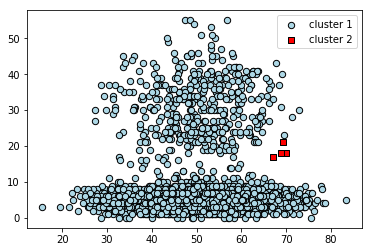

In [11]:
dbscan = DBSCAN(eps=5, min_samples=5, metric="euclidean")
y_dbscan = dbscan.fit_predict(X)

plt.scatter(X[y_dbscan == 0, 0], X[y_dbscan == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
plt.scatter(X[y_dbscan == 1, 0], X[y_dbscan == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
plt.legend()
plt.show()

#### eps=5, min_samples=10

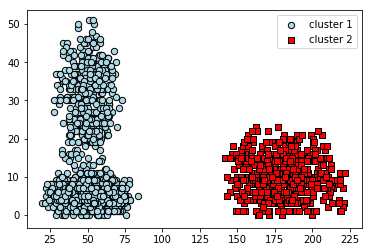

In [12]:
dbscan = DBSCAN(eps=5, min_samples=10, metric="euclidean")
y_dbscan = dbscan.fit_predict(X)

plt.scatter(X[y_dbscan == 0, 0], X[y_dbscan == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
plt.scatter(X[y_dbscan == 1, 0], X[y_dbscan == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
plt.legend()
plt.show()

#### eps=5, min_samples=20

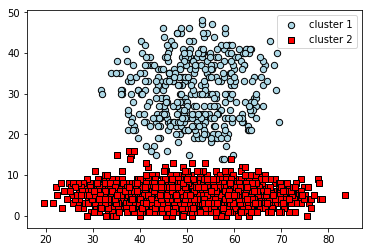

In [13]:
dbscan = DBSCAN(eps=5, min_samples=20, metric="euclidean")
y_dbscan = dbscan.fit_predict(X)

plt.scatter(X[y_dbscan == 0, 0], X[y_dbscan == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
plt.scatter(X[y_dbscan == 1, 0], X[y_dbscan == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
plt.legend()
plt.show()

#### eps=5, min_samples=20

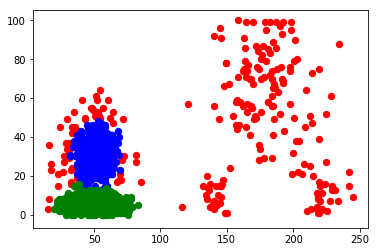

In [14]:
dbscan = DBSCAN(eps=5, min_samples=20, metric="euclidean")
y_dbscan = dbscan.fit_predict(X)

colors =  ['red', 'blue','green'] 
for color, i in zip(colors, [-1,0,1,2]):
    plt.scatter(X[y_dbscan == i, 0], X[y_dbscan == i, 1],color=color, marker='o', s=40,
    label='cluster 1')

##  Questões conceituais:

### 1  Quais as diferenças entre feature selection e feature extraction? 

* Feature extraction tranforma as features existentes em um espaço dimensional menor, enquanto a Feature selection seleciona um subconjunto das features existentes sem haver tranformação.

### 2 Dê exemplos de técnicas usadas para feature selection.

* Filter feature selection, aplica uma medida estatistica para atribuir uma pontuação a cada feature. As features são ranqueadas pela pontuação e selecionados para serem mantidos ou removidos do conjunto de dados.

* Wrapper methods considera a seleão de um conjunto de features como um problema de busca, onde diferentes combinações são preparadas, avaliadas e comparadas com outras. um modelo predidtivo é utilizado para avaliar a combinação das features e atribuir uma pontuação baseada na acurácia.

 
### 4 Dê exemplos de técnicas usadas para feature extraction. 

*   sequence matching likelihood, Parametric distributions, minimal description length, Frequency domain

##  Iris dataset 

In [15]:
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

### PCA

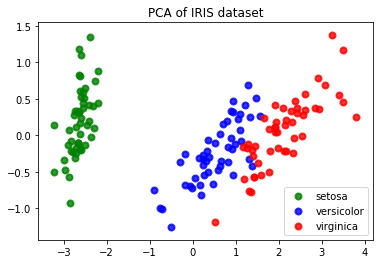

In [16]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

plt.figure();
colors = ['green', 'blue', 'red']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name);
plt.legend(loc='best', shadow=False, scatterpoints=1);
plt.title('PCA of IRIS dataset');

### LDA

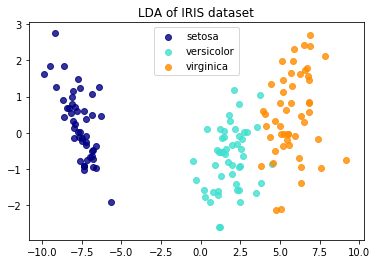

In [17]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()
